<a href="https://colab.research.google.com/github/GladysJoseph/github_python_repo/blob/main/Marketing_ABTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The objective to this Marketing analysis is to find if marketing worked with the advertisement that were being pushed out to population of 588102 individuals.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


import random

In [4]:
# pandas read file
df=pd.read_csv('/content/drive/MyDrive/marketing_AB_Test.csv')

##**EDA Analysis**

This dataset is a Maketing dataset that has seven veriables and 588102 observations,  The variablws are unnamed, user_id, test group, converted, total ads, most ads day, and most ads hour. The data type are:  unnamed- integ, user_id- integ, test group- object, converted- boolean , total ads-integ, most ads day- object, and most ads hour- integ.  There are 807 ads that are ran through the seven days of the week.  There are two test groups.
Most ads are presented on Mondays and Satudrdays we find to have the least amount of advertisements.

In [5]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [6]:
df.tail()


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23
588100,588100,1237779,ad,False,1,Tuesday,23


In [7]:
df.shape

(588101, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [9]:
df.nunique()

Unnamed: 0       588101
user id          588101
test group            2
converted             2
total ads           807
most ads day          7
most ads hour        24
dtype: int64

In [10]:
df.isnull()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
588096,False,False,False,False,False,False,False
588097,False,False,False,False,False,False,False
588098,False,False,False,False,False,False,False
588099,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [12]:
df.describe()


,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279668,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


In [13]:
if "Unnamed: 0" in df.columns:

    df = df.drop(["Unnamed: 0"], axis =1)

In [14]:
df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
df.head(1)

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20


In [15]:
#duplicate rows?
dups = df.duplicated()
print(dups.any())

False


In [16]:
# Select columns 1, 2, 4, and 5 from the original DataFrame
new_df = df.iloc[:, [1, 2, 4, 5]].copy()

In [17]:
head = new_df.head()

In [18]:
df.describe()

,user_id,total_ads,most_ads_hour
count,5.881010e+05,588101.000000,588101.000000
mean,1.310692e+06,24.820876,14.469061
std,2.022260e+05,43.715181,4.834634
min,9.000000e+05,1.000000,0.000000
25%,1.143190e+06,4.000000,11.000000
50%,1.313725e+06,13.000000,14.000000
75%,1.484088e+06,27.000000,18.000000
max,1.654483e+06,2065.000000,23.000000


In [19]:
#duplicated user_id?
df[df["user_id"].duplicated()].count()

user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64

In [20]:
print(f'Rows            : {df.shape[0]}')
print(f'Columns         : {df.shape[1]}')
print(f'Features        : {df.columns.tolist()}')
print(f'Missing Values  : {df.isnull().values.sum()}')
print(f'Unique Values   : \n\n{df.nunique()}')

Rows            : 588101
Columns         : 6
Features        : ['user_id', 'test_group', 'converted', 'total_ads', 'most_ads_day', 'most_ads_hour']
Missing Values  : 0
Unique Values   : 

user_id          588101
test_group            2
converted             2
total_ads           807
most_ads_day          7
most_ads_hour        24
dtype: int64


In [21]:
df.isnull().any()

user_id          False
test_group       False
converted        False
total_ads        False
most_ads_day     False
most_ads_hour    False
dtype: bool

In [22]:
df["converted_int"] = df['converted'].apply(lambda x:1 if x== True  else  0)
df["converted_int"].sum()

14843

In [23]:
df.head(5)

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour,converted_int
0,1069124,ad,False,130,Monday,20,0
1,1119715,ad,False,93,Tuesday,22,0
2,1144181,ad,False,21,Tuesday,18,0
3,1435133,ad,False,355,Tuesday,10,0
4,1015700,ad,False,276,Friday,14,0


In [24]:
def val_count(column, color='blue'):
    plt.figure(figsize=(7,5))
    sns.countplot(data=df, x=column, color=color)
    plt.title(f'Value Count - {column}')
    plt.show()

    val_count('column_name', color='green')

    #print(df[column].value_counts())

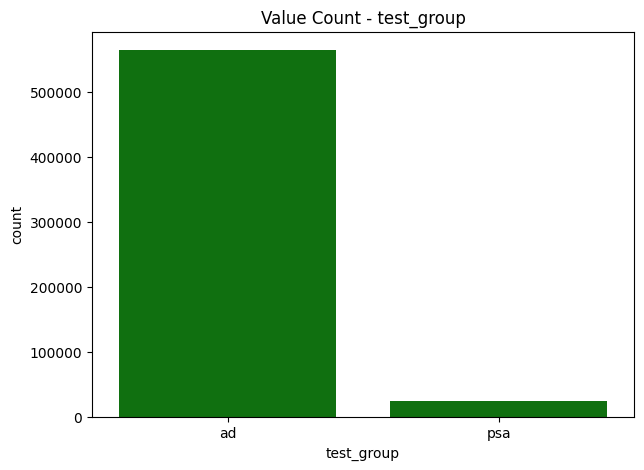

In [25]:
def val_count(column, color='blue'):
    plt.figure(figsize=(7,5))
    sns.countplot(data=df, x=column, color=color)
    plt.title(f'Value Count - {column}')
    plt.show()

# Replace 'column_name' with the actual column name from the DataFrame
val_count('test_group', color='green')

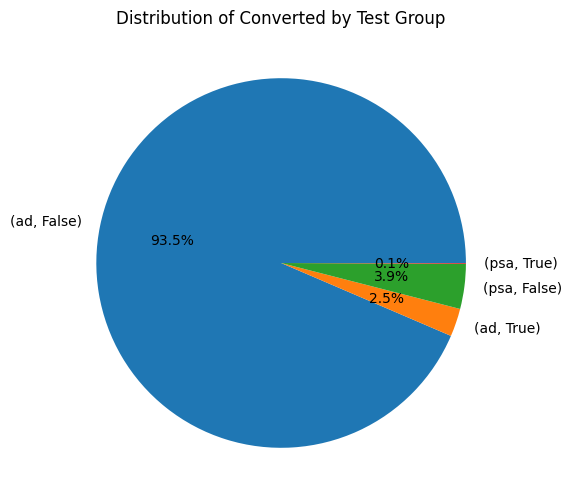

In [26]:
grouped_counts = df.groupby('test_group')['converted'].value_counts()
grouped_counts

# Plot the data as a pie chart
grouped_counts.plot.pie(figsize= (6,6),autopct='%1.1f%%')

# Set the title and axis labels
plt.title('Distribution of Converted by Test Group')
plt.ylabel('')

# Show the plot
plt.show()

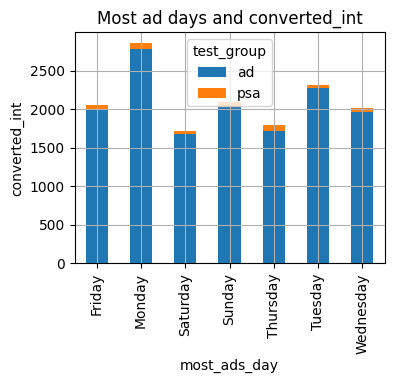

In [27]:
ax =df.groupby(by =['most_ads_day', 'test_group']).sum()['converted_int'].unstack('test_group').plot(kind= 'bar', figsize= (4,3), grid= True, stacked= True)
ax.set_ylabel('converted_int')
ax.set_title('Most ad days and converted_int')
plt.show()

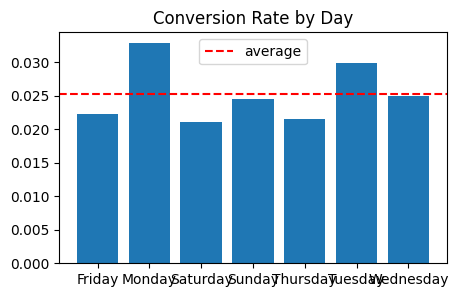

In [28]:
#visualize conversion by day
df_day_conv = pd.DataFrame(df.groupby('most_ads_day')['converted'].mean())
df_day_conv.reset_index(inplace=True)

plt.figure(figsize=(5,3))
plt.bar(data=df_day_conv, x='most_ads_day', height='converted')
plt.title('Conversion Rate by Day')
plt.axhline(df['converted'].mean(), color='r', linestyle='--', label='average')
plt.legend()
plt.show()

## **AB Test**

In [29]:
#These values are often used in hypothesis testing and constructing confidence intervals,
#particularly when the population standard deviation is known and the sample size is sufficiently large.
#confidence Level and Z score

import math

def sample_size_calculator(population_size, confidence_level, margin_of_error):
    z_score = {
        0.90: 1.645,
        0.95: 1.96,
        0.99: 2.576
    }

    z = z_score[confidence_level]
    p = 0.5 # assuming 50% for a conservative estimate of the sample size
    q = 1 - p

    sample_size = ((z**2) * p * q * population_size) / ((z**2 * q) + ((margin_of_error**2) * (population_size - 1)))
    return math.ceil(sample_size)

In [30]:
#compute the sample size to achieve a specified margin of error at a particular confidence level, given the population size.
pop_size = df.shape[0]
conf_level = 0.99
margin_err = 0.03

sample_size = sample_size_calculator(pop_size, conf_level, margin_err)
print(f"The population size is :{pop_size} \nThe required sample size is: {sample_size}")

The population size is :588101 
The required sample size is: 1832


In [31]:
treatment = df.query('test_group == "ad"')
control = df.query('test_group == "psa"')

In [32]:
df.converted.mean()

0.02523886203220195

In [33]:
control["converted"].mean()

0.01785410644448223

In [34]:
treatment["converted"].mean()

0.025546559636683747

 The mean of converted in treatment group is more than control group which make the hypothsis of ad having positive effect on conversion

(array([  1.,   2.,   1.,   1.,   7.,  10.,   9.,  22.,  28.,  41.,  51.,
         84., 114., 138., 178., 214., 273., 302., 398., 404., 480., 544.,
        595., 633., 623., 596., 597., 553., 475., 480., 439., 335., 318.,
        251., 188., 189., 118.,  97.,  71.,  37.,  36.,  19.,  14.,  11.,
          5.,   6.,   7.,   2.,   1.,   2.]),
 array([0.02444308, 0.0244751 , 0.02450713, 0.02453915, 0.02457117,
        0.0246032 , 0.02463522, 0.02466725, 0.02469927, 0.02473129,
        0.02476332, 0.02479534, 0.02482737, 0.02485939, 0.02489141,
        0.02492344, 0.02495546, 0.02498749, 0.02501951, 0.02505153,
        0.02508356, 0.02511558, 0.02514761, 0.02517963, 0.02521165,
        0.02524368, 0.0252757 , 0.02530773, 0.02533975, 0.02537177,
        0.0254038 , 0.02543582, 0.02546785, 0.02549987, 0.02553189,
        0.02556392, 0.02559594, 0.02562797, 0.02565999, 0.02569201,
        0.02572404, 0.02575606, 0.02578809, 0.02582011, 0.02585213,
        0.02588416, 0.02591618, 0.02594821, 0.

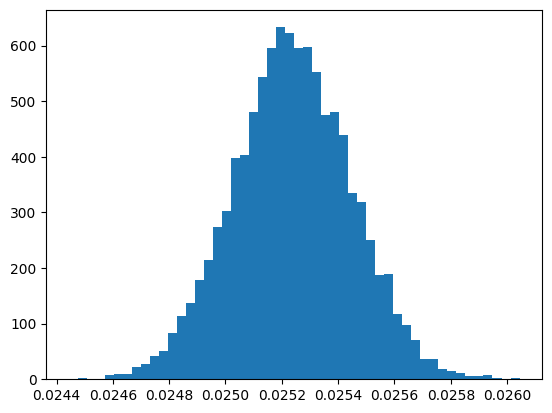

In [35]:
ad_converted = np.random.binomial(len(treatment),
                                  df.converted.mean(), 10000) / len(treatment)

plt.hist(ad_converted, bins=50)

(array([  2.,   0.,   3.,   5.,  16.,  15.,  20.,  28.,  58.,  97., 133.,
        145., 152., 242., 373., 436., 461., 479., 600., 595., 661., 668.,
        659., 658., 442., 545., 525., 409., 367., 289., 244., 200., 130.,
        105.,  72.,  61.,  45.,  13.,  14.,  14.,   4.,   7.,   5.,   0.,
          1.,   0.,   0.,   1.,   0.,   1.]),
 array([0.02159497, 0.02176161, 0.02192824, 0.02209488, 0.02226152,
        0.02242816, 0.0225948 , 0.02276144, 0.02292807, 0.02309471,
        0.02326135, 0.02342799, 0.02359463, 0.02376127, 0.0239279 ,
        0.02409454, 0.02426118, 0.02442782, 0.02459446, 0.0247611 ,
        0.02492773, 0.02509437, 0.02526101, 0.02542765, 0.02559429,
        0.02576093, 0.02592756, 0.0260942 , 0.02626084, 0.02642748,
        0.02659412, 0.02676075, 0.02692739, 0.02709403, 0.02726067,
        0.02742731, 0.02759395, 0.02776058, 0.02792722, 0.02809386,
        0.0282605 , 0.02842714, 0.02859378, 0.02876041, 0.02892705,
        0.02909369, 0.02926033, 0.02942697, 0.

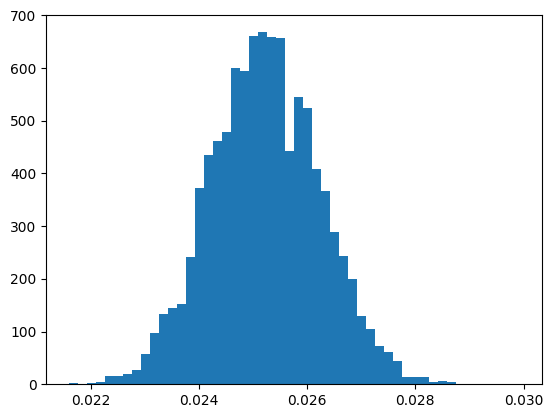

In [36]:
psa_converted = np.random.binomial(len(control),
                                   df.converted.mean(), 10000) / len(control)

plt.hist(psa_converted, bins=50 ,align = 'mid' , data=None)

In [37]:
p_diffs = ad_converted - psa_converted
p_diffs
p_diffs.mean()

7.391320952776728e-06

The mean difference is extremely close to zero (-4.92e-06), it indicates that, on average, there is almost no difference between the conversion rates of the two groups.  the average difference in conversion rates between the two groups is essentially negligible or very close to zero. This suggests that there is no significant difference in conversion rates between the two groups, based on the data

In [38]:
#real diff
# customer who is shown ads bought less
#calculating the observed difference in conversion rates between two groups in an A/B test
#treatment['converted'].mean...(Calculates the mean conversion rate for the treatment group.
#control['converted'].mean(): This calculates the mean conversion rate for the control group.
#ab_data_diff: This calculates the observed difference in conversion rates between the treatment and control groups.
ab_data_diff = treatment['converted'].mean() - control['converted'].mean()
ab_data_diff

0.007692453192201517

# Does showing ads to people lead to more purchases? Is this statistically significant or not? Null Hypothesis (H0): Showing ads has no significant effect on the number of purchases. Alternative Hypothesis (H1): Showing ads has a significant effect on the number of purchases.

In [39]:
# is buying less is
if ab_data_diff > 0 :
    p_value = (p_diffs > ab_data_diff).mean() * 100
else :
    p_value = (p_diffs <= ab_data_diff).mean() * 100
print ( "p_value = " ,p_value)
if p_value < 0.05:
    print( 'Reject the null hypothesis. There is a significant difference between the two groups.')
else:
    print( 'Fail to reject the null hypothesis. There is no significant difference between the two groups.')

p_value =  0.0
Reject the null hypothesis. There is a significant difference between the two groups.


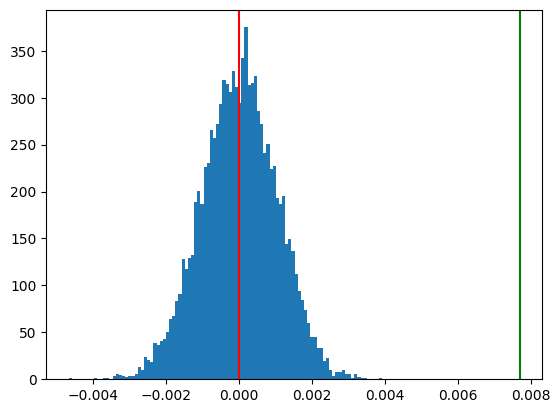

In [40]:
plt.hist(p_diffs, bins=100)
low = ab_data_diff
higth = p_diffs.mean()
plt.axvline(x=low, color='g')
plt.axvline(x=higth, color='r')

# **A B Test  Simulation**

In [41]:
treatment = df.query('test_group == "ad"')
control = df.query('test_group == "psa"')

In [42]:
dif = treatment["converted"].mean() - control["converted"].mean()
dif

0.007692453192201517

In [43]:
conversion = np.array([
    np.append(np.zeros(len(control["converted"])), np.ones(len(treatment["converted"]))),
    np.append(control["converted"],treatment["converted"])
])
conversion_t = conversion.T
conversion_t

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [44]:
def sh_exp(N):
    experiment_diff_mean = np.empty([N, 1])
    for times in np.arange(N):
        experiment_label = np.random.randint(0, 2, len(conversion_t))
        experiment_data = np.array([
            experiment_label,
            conversion_t[:, 1]
        ]).T
        experiment_diff_mean[times] = experiment_data[experiment_data[:, 0] == 1][:, 1].mean() - experiment_data[experiment_data[:, 0] == 0][:, 1].mean()
    return experiment_diff_mean

In [45]:
n=2000
p_difs = sh_exp(n)

if dif > 0  :
    p_value = len(p_difs[p_difs >= dif]) / n * 100
else :
    p_value = len(p_difs[p_difs <= dif]) / n * 100

if p_value < 0.05:
    print( 'Reject the null hypothesis. There is a significant difference between the two groups.')
else:
    print( 'Fail to reject the null hypothesis. There is no significant difference between the two groups.')

Reject the null hypothesis. There is a significant difference between the two groups.


**Reject the null hypothesis. There is a significant difference between the two groups.**

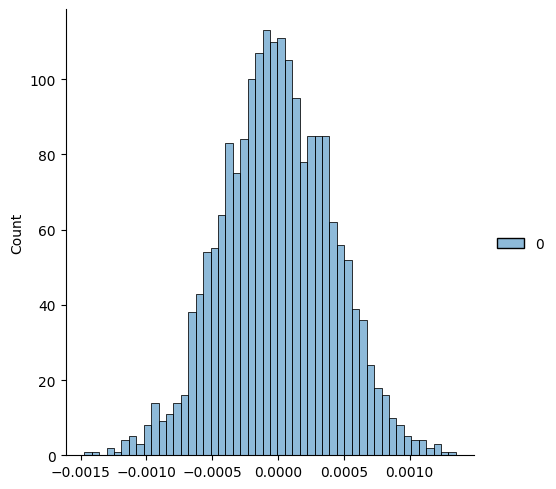

In [46]:
sns.displot(p_difs, bins=50)

# **T-Test **

**Check the distribution of ther two groups by KDE**

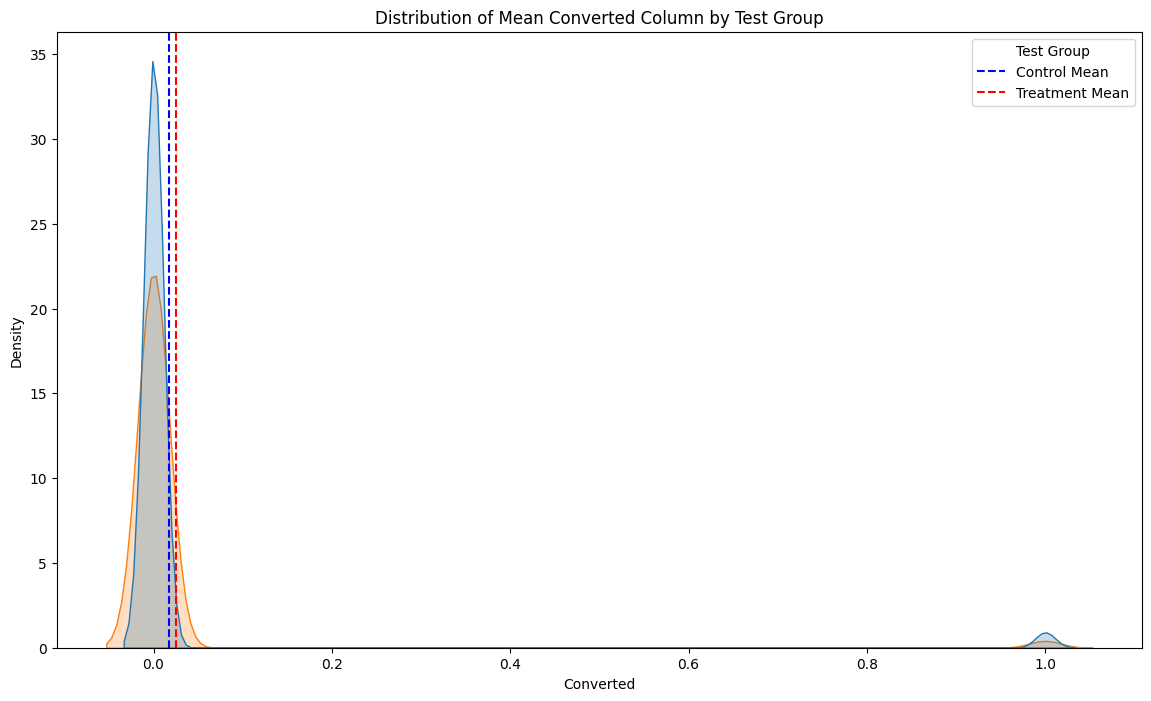

In [47]:
control_mean = df.loc[df['test_group'] == 'psa', 'converted'].mean()
treatment_mean = df.loc[df['test_group'] == 'ad', 'converted'].mean()

plt.figure(figsize=(14, 8))
sns.kdeplot(data=df, x='converted', hue='test_group', fill=True, common_norm=False)
plt.axvline(control_mean, color='b', linestyle='--', label='Control Mean')
plt.axvline(treatment_mean, color='r', linestyle='--', label='Treatment Mean')
plt.title('Distribution of Mean Converted Column by Test Group')
plt.xlabel('Converted')
plt.ylabel('Density')
plt.legend(title='Test Group')
plt.show()

**Check distribution of each group using bootsrap**

Bootstrap resampling provides a powerful tool for statistical inference and analysis, especially when traditional methods may not be appropriate or feasible. It allows for more accurate estimation and inference, particularly in situations where the underlying distribution is unknown or when data are limited.

In [ ]:
boot_treatment=[]
for i in range(1000):
    boot_mean = treatment.sample(frac=1, replace=True)['converted'].mean()
    boot_treatment.append(boot_mean)
boot_treatment=pd.DataFrame(boot_treatment)
boot_treatment.plot(kind='density');

boot_control=[]

for i in range(1000):
    boot_mean=control.sample(frac=1,replace=True)['converted'].mean()
    boot_control.append(boot_mean)

boot_control=pd.DataFrame(boot_control)
boot_control.plot(kind='density');


In [ ]:
def t_test(treatment_data, control_data) :

    t_statistic, p_value = stats.ttest_ind(treatment_data, control_data)
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)

    if p_value < 0.05 :
        print( 'Reject the null hypothesis. There is a significant difference between the two groups.')
    else:
        print( 'Fail to reject the null hypothesis. There is no significant difference between the two groups.')

    return t_statistic, p_value


# Perform a t-test to compare the means of the two groups
t_statistic, p_value = t_test(treatment["converted"], control["converted"])


# **CHI- Test**
The chi-square test is a versatile tool for analyzing categorical data and assessing the distribution of variables. It allows researchers to test hypotheses about the distribution of categorical variables and to identify relationships between variables in a wide range of research contexts.

In [ ]:
ct = pd.crosstab(df['test_group'], df['converted'], margins=True)


ct

In [ ]:
#create a NumPy array- d containing data from a pandas DataFrame -ct.
#ct.iloc[0][: -1]-use integer-location based indexing. [: -1] selects all columns except the last one. .values converts the selected row into a NumPy array.
#ct.iloc[1][: -1].values: this part selects the second row of the DataFrame ct, excluding the last column, and converts it into a NumPy array.


d = np.array([ct.iloc[0][: -1].values, ct.iloc[1][: -1].values])
d

In [ ]:
chi2, p_value, dof, expected  =stats.chi2_contingency(ct)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

In [ ]:
if p_value < 0.05:
    print ( 'Reject the null hypothesis. There is a significant difference between the two groups.')
else:
    print ('Fail to reject the null hypothesis. There is no significant difference between the two groups.')

